![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Linear Regression and Optimization

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

In this exercise we will compare the **DAX index** (.GDAXI) to a portfolio build from the **constituents** (the remaining columns).

### Task:

Find the vector of weights $\mathbf{w}$ for the [Minimum Variance Portfolio (MVP)](https://en.wikipedia.org/wiki/Modern_portfolio_theory) using only the constituents (not .GDAXI). Print risk ($\sigma$) and return ($\mu$) of both, DAX and MVP. Show in a single graph the cumulative log-returns of both portfolios. Please note that the sum of $\mathbf{w}$ must be $100$%. ALso, you are not allowed to use short positions, i.e. $w \ge 0\ \forall\ w \in \mathbf{w}$.

Hint: The portfolio variance - which we want to minimize - is given by
$$
\sigma^2_\text{Portfolio} = \mathbf{w}^\intercal \mathbf{\Sigma} \mathbf{w},
$$
where $\mathbf{\Sigma}$ is the correlation matrix of the portfolio constituents.

The optimal weights for the MVP:[0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103]
DAX Return (µ): 0.12064034076902336
DAX Risk (σ): 0.19200730935077592
MVP Return (µ): 0.06508000546000185
MVP Risk (σ): 0.012867995467185927


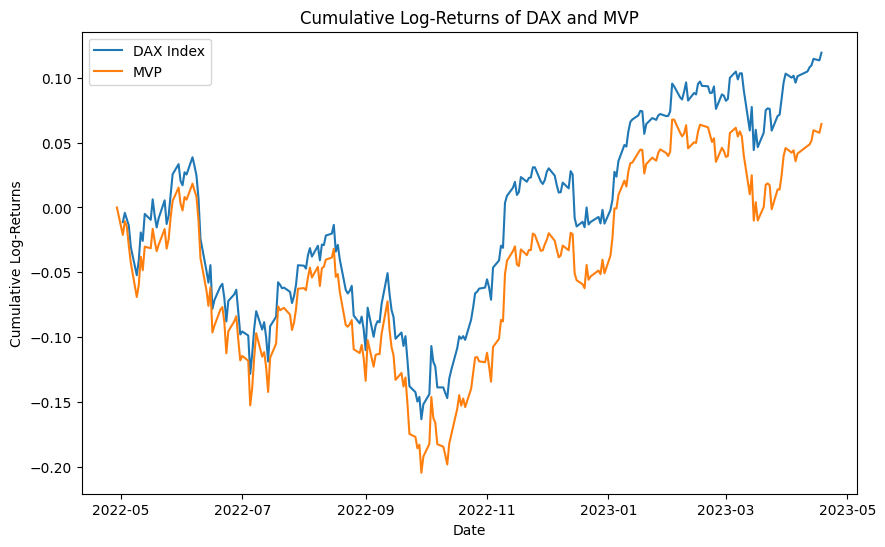

In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate the daily log-returns
df_log_returns = np.log(df / df.shift(1))

# Extract the log-returns of the constituents
constituents_log_returns = df_log_returns.drop('.GDAXI', axis=1)

# Calculate the covariance matrix of the constituents
cov_matrix = constituents_log_returns.cov()

# Define the optimization problem
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Constraints for the weights (no short positions and sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'ineq', 'fun': lambda x: x})

# Initial guess for the weights
num_assets = len(constituents_log_returns.columns)
initial_guess = np.ones(num_assets) / num_assets

# Optimization
result = sco.minimize(portfolio_variance, initial_guess,
                      args=(cov_matrix,), method='SLSQP',
                      constraints=constraints)

# The optimal weights for the MVP
weights_mvp = result.x

# Calculate the MVP risk (σ) and return (µ)
mvp_risk = np.sqrt(portfolio_variance(weights_mvp, cov_matrix))
mvp_return = np.sum(weights_mvp * constituents_log_returns.mean()) * 252

# Calculate the cumulative log-returns for the DAX and MVP
df_cumulative_log_returns = df_log_returns.cumsum()
mvp_cumulative_log_returns = (constituents_log_returns * weights_mvp).sum(axis=1).cumsum()

# Calculate the DAX risk (σ) and return (µ)
dax_log_returns = df_log_returns['.GDAXI']
dax_return = dax_log_returns.mean() * 252  # Annualized return
dax_risk = dax_log_returns.std() * np.sqrt(252)  # Annualized risk

print(f"The optimal weights for the MVP:{weights_mvp}")

# Print the DAX and MVP risk and return
print(f"DAX Return (µ): {dax_return}")
print(f"DAX Risk (σ): {dax_risk}")
print(f"MVP Return (µ): {mvp_return}")
print(f"MVP Risk (σ): {mvp_risk}")

# Plot the cumulative log-returns
plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_log_returns['.GDAXI'], label='DAX Index')
plt.plot(mvp_cumulative_log_returns, label='MVP')
plt.title('Cumulative Log-Returns of DAX and MVP')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Returns')
plt.legend()
plt.show()

### Task:

Use a linear regression model to find the actual weights of the index constituents that are required to replicate (i.e. explain) the returns of the DAX index. Print risk and return and show in a single graph the cumulative log-returns of both portfolios. Also show the [tracking error](https://en.wikipedia.org/wiki/Tracking_error) as the difference between the index and the replicating portfolio in the same figure.

The weights for the index constituents: [0.09570234127139149, 0.07088165336005028, 0.05489957259347593, 0.06649780278688998, 0.0775564545741552, 0.020035205554555204, 0.012194619173270613, 0.027566765101396086, 0.01939424755407872, 0.05562251629188943, 0.026800278178855063, 0.040553755565534984, 0.052133731209764944, 0.007294575312539879, 0.029262483597051914, 0.016815904105940714, 0.013642460322608402, 0.0072969231687462985, 0.036323833842472536, 0.02143945426328705, 0.008215296317003618, 0.02159122813802286, 7.484293689589805e-05, 0.022703441478565914, 0.010339639100439162, 0.006359560547835607, 0.013645485409116333, 0.015980542708533208, 0.005776614821744517, 0.010050269238241868, 0.02442810905116806, 0.009945536170190464, 0.007234846985951864, -0.0036091218808033546, 0.011275867156464503, 0.007228463950131256, 0.02726617934324083, 0.016625812393090866, 0.029113747744647027]
Index Return (µ): 0.1000
Index Risk (σ): 0.0120
MVP Return (µ): 0.0651
MVP Risk (σ): 0.0129


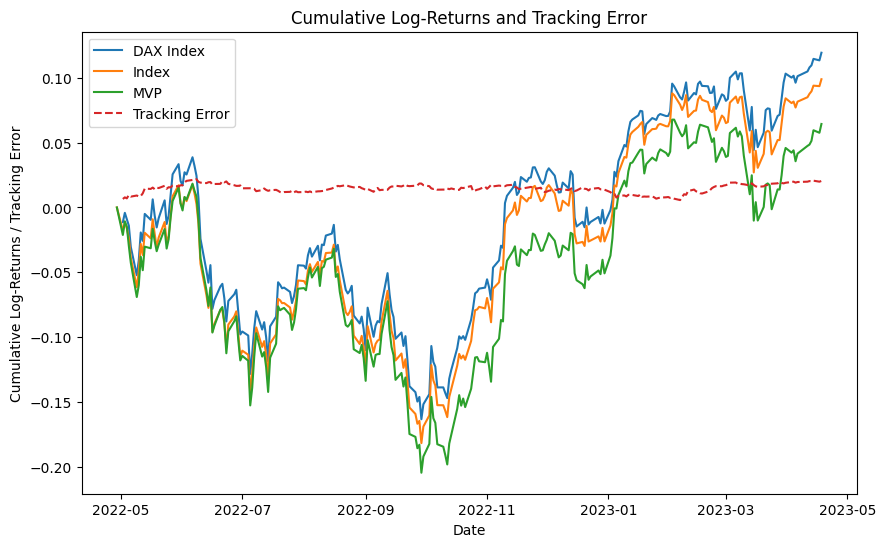

In [6]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import matplotlib.pyplot as plt


#%% from perivous codes

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate the daily log-returns
df_log_returns = np.log(df / df.shift(1))

# Extract the log-returns of the constituents
constituents_log_returns = df_log_returns.drop('.GDAXI', axis=1)

# Calculate the covariance matrix of the constituents
cov_matrix = constituents_log_returns.cov()

# Define the optimization problem
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Constraints for the weights (no short positions and sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'ineq', 'fun': lambda x: x})

# Initial guess for the weights
num_assets = len(constituents_log_returns.columns)
initial_guess = np.ones(num_assets) / num_assets

# Optimization
result = sco.minimize(portfolio_variance, initial_guess,
                      args=(cov_matrix,), method='SLSQP',
                      constraints=constraints)

# The optimal weights for the MVP
weights_mvp = result.x

# Calculate the MVP risk (σ) and return (µ)
mvp_risk = np.sqrt(portfolio_variance(weights_mvp, cov_matrix))
mvp_return = np.sum(weights_mvp * constituents_log_returns.mean()) * 252

# Calculate the cumulative log-returns for the DAX and MVP
df_cumulative_log_returns = df_log_returns.cumsum()
mvp_cumulative_log_returns = (constituents_log_returns * weights_mvp).sum(axis=1).cumsum()

# Calculate the DAX risk (σ) and return (µ)
dax_log_returns = df_log_returns['.GDAXI']
dax_return = dax_log_returns.mean() * 252  # Annualized return
dax_risk = dax_log_returns.std() * np.sqrt(252)  # Annualized risk

# Calculate the MVP risk (σ) and return (µ)
mvp_risk = np.sqrt(portfolio_variance(weights_mvp, cov_matrix))
mvp_return = np.sum(weights_mvp * constituents_log_returns.mean()) * 252

#%% New codes
# Prepare the data for the linear regression model
X = constituents_log_returns.dropna()
y = df_log_returns.loc[X.index, '.GDAXI']

# Convert DataFrame to numpy array after creating y
X = X.values
y = y.values

# Fit a linear model
def fun(beta, X, y):
    y_hat = beta[0] + np.dot(X, beta[1:])
    squares = (y - y_hat)**2
    return np.sum(squares)

# Initial guess for the weights
initial_guess = np.ones(X.shape[1] + 1)

# Optimization
result = sco.minimize(fun, initial_guess, args=(X, y), method='BFGS')
intercept, *weights_index = result.x

# Calculate the index risk (σ) and return (µ)
index_return = np.sum(weights_index * constituents_log_returns.mean()) * 252
index_risk = np.sqrt(portfolio_variance(np.array(weights_index), cov_matrix))

# Calculate the cumulative log-returns for the index
index_cumulative_log_returns = (constituents_log_returns * weights_index).sum(axis=1).cumsum()

# Calculate the tracking error
tracking_error = df_cumulative_log_returns['.GDAXI'] - index_cumulative_log_returns

print(f"The weights for the index constituents: {weights_index}")
print(f"Index Return (µ): {index_return:.4f}")
print(f"Index Risk (σ): {index_risk:.4f}")

# Print the MVP and Index risk and return
print(f"MVP Return (µ): {mvp_return:.4f}")
print(f"MVP Risk (σ): {mvp_risk:.4f}")

# Plot the cumulative log-returns and tracking error
plt.figure(figsize=(10, 6))
plt.plot(df_cumulative_log_returns['.GDAXI'], label='DAX Index')
plt.plot(index_cumulative_log_returns, label='Index')
plt.plot(mvp_cumulative_log_returns, label='MVP')
plt.plot(tracking_error, label='Tracking Error', linestyle='--')
plt.title('Cumulative Log-Returns and Tracking Error')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Returns / Tracking Error')
plt.legend()
plt.show()


### Task:

We want to create a ["smart-beta"](https://en.wikipedia.org/wiki/Smart_beta) strategy that replicates the DAX index returns using only a subset of its constituents. This is, maximize the fit of the model using only $3$ constituents. This process is similar to [feature selection](https://en.wikipedia.org/wiki/Feature_selection) in machine learning. Print risk and return and show in a single graph the cumulative log-returns of both portfolios. Also show the [tracking error](https://en.wikipedia.org/wiki/Tracking_error) as the difference between the index and the replicating portfolio in the same figure.

Risk of DAX:  0.0121
Return of DAX:  0.0005
Risk of replicating portfolio:  0.0417
Return of replicating portfolio:  0.0017


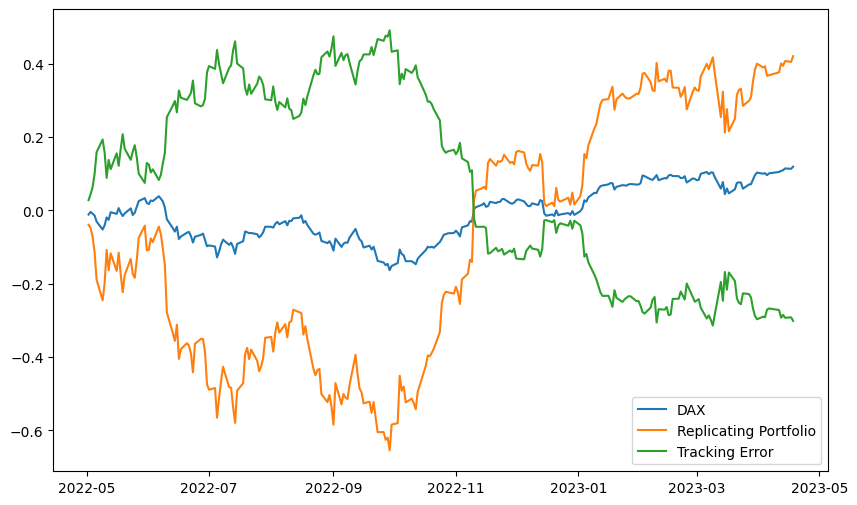

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate log returns
df = np.log(df / df.shift(1)).dropna()

# Split the data into DAX and constituents
dax = df['.GDAXI']
constituents = df.drop(columns=['.GDAXI'])

# Add a constant to the constituents
constituents = np.column_stack([constituents, np.ones(len(constituents))])

# Fit a linear regression model using numpy
model, residuals, rank, s = np.linalg.lstsq(constituents, dax, rcond=None)

# Get the top 3 constituents by absolute coefficient value
top3 = np.abs(model[:-1]).argsort()[-3:][::-1]
replicating_portfolio = df.iloc[:, top3+1]

# Calculate the cumulative log-returns
dax_cumulative = dax.cumsum()
replicating_cumulative = replicating_portfolio.sum(axis=1).cumsum()

# Calculate tracking error
tracking_error = dax_cumulative - replicating_cumulative

# Print risk and return
print("Risk of DAX: ", round(dax.std(), 4))
print("Return of DAX: ", round(dax.mean(), 4))
print("Risk of replicating portfolio: ", round(replicating_portfolio.sum(axis=1).std(), 4))
print("Return of replicating portfolio: ", round(replicating_portfolio.sum(axis=1).mean(), 4))


# Plot the cumulative log-returns
plt.figure(figsize=(10, 6))
plt.plot(dax_cumulative, label='DAX')
plt.plot(replicating_cumulative, label='Replicating Portfolio')
plt.plot(tracking_error, label='Tracking Error')
plt.legend()
plt.show()